In [57]:
from numpy.random import seed
seed(1)

In [58]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [59]:
df = pd.read_excel("covid_statetrends.xlsx")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
pd.set_option('display.max_columns', None)
# Drop the null rows
df = df.dropna()
df.head(100)

,DATE,COVID_TEST,DAILY_DELTA_TESTS,DAILY_BASE_TESTS,COVID_COUNT,DAILY_DELTA_CASES,DAILY_BASE_CASES,COVID_DEATHS,DAILY_DELTA_DEATHS,DAILY_BASE_DEATHS,COVID_COUNT_CUMSUM,COVID_DEATHS_CUMSUM,COVID_TEST_CUMSUM
0,2020-02-29,1,0,1,0,0,0,0,0,0,0,0,1
1,2020-03-02,2,0,2,0,0,0,0,0,0,0,0,3
2,2020-03-03,4,0,4,0,0,0,0,0,0,0,0,7
3,2020-03-04,4,0,4,0,0,0,0,0,0,0,0,11
4,2020-03-05,2,0,2,0,0,0,0,0,0,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2020-05-03,1571,59,1512,574,1,573,30,1,29,20480,1220,121821
64,2020-05-04,4311,1464,2847,530,0,530,34,0,34,21010,1254,126132
65,2020-05-05,3395,2785,610,842,3,839,34,3,31,21852,1288,129527
66,2020-05-06,454,364,90,630,3,627,27,13,14,22482,1315,129981


In [60]:
X = df.drop("DATE", axis=1)
y = df["DATE"]
print(X.shape, y.shape)

(68, 12) (68,)


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [62]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [63]:
for label, original_class in zip(encoded_y, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: 2020-02-29
Encoded Label: 0
------------
Original Class: 2020-03-02
Encoded Label: 1
------------
Original Class: 2020-03-03
Encoded Label: 2
------------
Original Class: 2020-03-04
Encoded Label: 3
------------
Original Class: 2020-03-05
Encoded Label: 4
------------
Original Class: 2020-03-06
Encoded Label: 5
------------
Original Class: 2020-03-07
Encoded Label: 6
------------
Original Class: 2020-03-08
Encoded Label: 7
------------
Original Class: 2020-03-09
Encoded Label: 8
------------
Original Class: 2020-03-10
Encoded Label: 9
------------
Original Class: 2020-03-11
Encoded Label: 10
------------
Original Class: 2020-03-12
Encoded Label: 11
------------
Original Class: 2020-03-13
Encoded Label: 12
------------
Original Class: 2020-03-14
Encoded Label: 13
------------
Original Class: 2020-03-15
Encoded Label: 14
------------
Original Class: 2020-03-16
Encoded Label: 15
------------
Original Class: 2020-03-17
Encoded Label: 16
------------
Original Class: 2020-03-

In [64]:
# Step 1: Label-encode data set

encoded_y_train = (encoded_y)
#encoded_y_test =(encoded_y)
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
#y_test_categorical = to_categorical(encoded_y_test)

In [65]:
y_train_categorical.shape

(68, 68)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_train_categorical, random_state=1)

In [67]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#X_train
#X_test

In [68]:
X_train.shape

(51, 12)

In [69]:
y_train.shape

(51, 68)

In [70]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=12))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=68, activation='softmax'))

In [72]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               1300      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 68)                6868      
Total params: 18,268
Trainable params: 18,268
Non-trainable params: 0
_________________________________________________________________


In [74]:
X_train.shape

(51, 12)

In [75]:
y_train.shape

(51, 68)

In [76]:
model.fit(
    X_train,
    y_train,
    epochs=60,
    shuffle=True,
    verbose=2
)

Train on 51 samples
Epoch 1/60
51/51 - 1s - loss: 9780.8809 - accuracy: 0.0196
Epoch 2/60
51/51 - 0s - loss: 6210.2832 - accuracy: 0.0196
Epoch 3/60
51/51 - 0s - loss: 4308.5894 - accuracy: 0.0196
Epoch 4/60
51/51 - 0s - loss: 3865.1887 - accuracy: 0.0000e+00
Epoch 5/60
51/51 - 0s - loss: 3340.4571 - accuracy: 0.0000e+00
Epoch 6/60
51/51 - 0s - loss: 2970.6041 - accuracy: 0.0000e+00
Epoch 7/60
51/51 - 0s - loss: 2454.5995 - accuracy: 0.0000e+00
Epoch 8/60
51/51 - 0s - loss: 1953.0817 - accuracy: 0.0000e+00
Epoch 9/60
51/51 - 0s - loss: 1508.9047 - accuracy: 0.0196
Epoch 10/60
51/51 - 0s - loss: 1281.9422 - accuracy: 0.0000e+00
Epoch 11/60
51/51 - 0s - loss: 1182.4907 - accuracy: 0.0392
Epoch 12/60
51/51 - 0s - loss: 1107.1641 - accuracy: 0.0196
Epoch 13/60
51/51 - 0s - loss: 994.1608 - accuracy: 0.0196
Epoch 14/60
51/51 - 0s - loss: 861.5360 - accuracy: 0.0000e+00
Epoch 15/60
51/51 - 0s - loss: 754.3187 - accuracy: 0.0000e+00
Epoch 16/60
51/51 - 0s - loss: 703.3635 - accuracy: 0.0196
E

In [77]:
# Save the model
model.save("Indiana5_9_20")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Indiana5_9_20\assets


In [78]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("Indiana5_9_20")

In [83]:
# Evaluate the model using the training data
model_loss, model_accuracy = model.evaluate(X_train, y_train, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

51/51 - 0s - loss: 11.7886 - accuracy: 0.1176
Loss: 11.788600229749493, Accuracy: 0.11764705926179886


In [100]:
# Grab just one data point to test with
test = np.expand_dims(X_test_scaled[0], axis=0)
test.shape

(1, 12)

In [101]:
# Make a prediction. The result should be 5 - STANDING
print(f"Predicted class: {model.predict_classes(test)}")

Predicted class: [0]


In [105]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_train, y_train)

score = model.score(X_train, y_train)
print(f"R2 Score: {score}")

R2 Score: 0.1799999883194452


C:\Users\bthom\Anaconda3\lib\site-packages\sklearn\base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


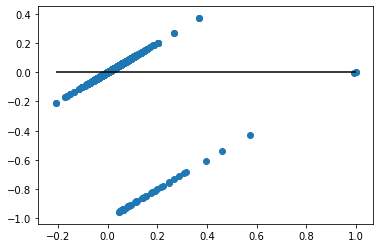

In [109]:
predictions = model.predict(X_train)
# Plot Residuals
plt.scatter(predictions, predictions - y_train)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [22]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

C:\Users\bthom\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


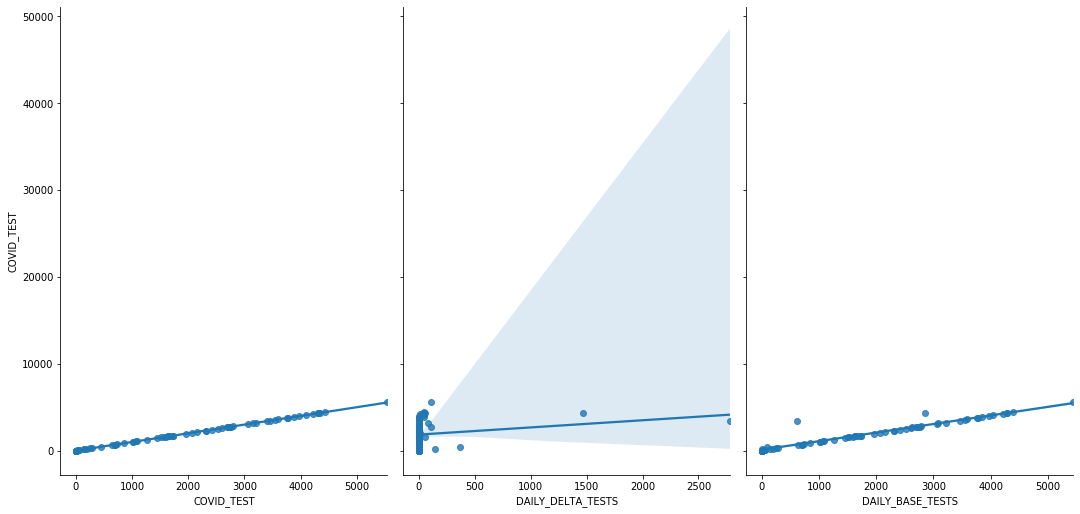

In [23]:
data = pd.read_excel(("covid_statetrends.xlsx"), index_col=0)
#print(X.shape, y.shape)
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(data, x_vars=[
    
'COVID_TEST',
'DAILY_DELTA_TESTS',
'DAILY_BASE_TESTS',
], y_vars="COVID_TEST", size=7, aspect=0.7, kind='reg')

C:\Users\bthom\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


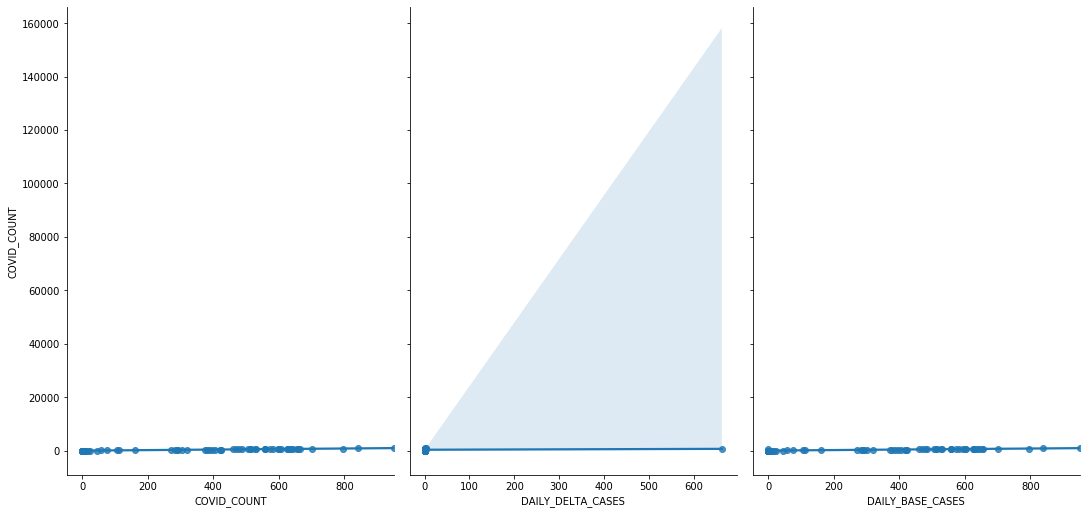

In [24]:
data = pd.read_excel(("covid_statetrends.xlsx"), index_col=0)
#print(X.shape, y.shape)
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(data, x_vars=[
    'COVID_COUNT',
'DAILY_DELTA_CASES',
'DAILY_BASE_CASES',
    

], y_vars="COVID_COUNT", size=7, aspect=0.7, kind='reg')

In [25]:
'COVID_COUNT',
'DAILY_DELTA_CASES',
'DAILY_BASE_CASES',
'COVID_DEATHS',
'DAILY_DELTA_DEATHS',
'DAILY_BASE_DEATHS',
'COVID_COUNT_CUMSUM',
'COVID_DEATHS_CUMSUM',
'COVID_TEST_CUMSUM',

('COVID_TEST_CUMSUM',)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(51, 12)
(17, 12)
(51, 68)
(17, 68)


In [27]:
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
yPrediction = linreg.predict(X_test)

In [67]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

[ 6.10454033e-02  6.10271767e-02  0.00000000e+00  6.09618367e-02
  6.09549597e-02  6.09438124e-02  6.08942825e-02  6.09561015e-02
  6.07107295e-02  6.04634336e-02  5.99903900e-02  5.80901879e-02
  5.62234395e-02  5.40506974e-02  5.48427703e-02  4.85487413e-02
  4.42356078e-02  3.77571348e-02  2.92940912e-02  1.93548294e-02
  2.23642908e-02  1.59069283e-02  8.51648789e-03  6.87806642e-04
 -1.13908060e-02 -1.64064084e-02  0.00000000e+00  0.00000000e+00
 -1.38589914e-02 -1.60589233e-02 -1.33809991e-02  0.00000000e+00
 -2.10372420e-02  0.00000000e+00  0.00000000e+00  1.45141426e-02
  0.00000000e+00  8.69854949e-03 -3.18551685e-03  0.00000000e+00
 -5.70658468e-04  6.68220622e-03  2.17225202e-02  2.98107630e-03
  5.69894151e-03  4.08989914e-03 -3.94670649e-03 -1.39668611e-02
  0.00000000e+00  0.00000000e+00 -8.18960830e-03  0.00000000e+00
 -5.08990450e-03 -1.45804108e-02  0.00000000e+00  0.00000000e+00
  2.93457882e-02  0.00000000e+00  4.01382999e-04  0.00000000e+00
  1.30279241e-03  0.00000